### **Importando Bibliotecas**

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Leyendo archivo del Titanic y enseñandolo**

In [241]:
df = pd.read_csv("data/Titanic-Dataset.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Mostrar información del dataset**

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Mostrando Estadísticas descriptivas**

In [243]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Mostrando filas y columnas**

In [244]:
print(f'El número de filas y columnas son: {df.shape}')

El número de filas y columnas son: (891, 11)


### **Duplicados y Nulos***

In [245]:
duplicados = df.duplicated().sum()

if duplicados > 0:
    print(f'Se encontraron {duplicados} filas duplicadas. Procediendo a eliminarlas')
    df.drop_duplicates(inplace=True) # Para eliminar los duplicados
else:
    print(f'No se encontraron filas duplicadas. No es necesario eliminarlas.')

print(f'Dimensiones tras el paso de duplicados: {df.shape}')

No se encontraron filas duplicadas. No es necesario eliminarlas.
Dimensiones tras el paso de duplicados: (891, 11)


## **Identificando y eliminando Nulos**

In [246]:
columnas_nulos = df.isnull().sum()
filas_nulos = df[df.isnull().any(axis=1)] # eje x
total_nulos = columnas_nulos.sum()

**Columnas con Nulos**

In [247]:
columnas_nulos

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**Filas con Nulos**

In [248]:
filas_nulos

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


**Total de Nulos**

In [249]:
print(f'El total de nulos es de: {total_nulos}')

El total de nulos es de: 866


### **Eliminando datos Nulos y reemplazando datos Nulos de Age, Embarked y Survived**

In [250]:
# Imputación y eliminación
if columnas_nulos['Age'] > 0:
    df['Age'] = df['Age'].fillna(df['Age'].median())
    print('Reemplazando de nulos por la mediana!')
else:
    print('No hay valores nulos que limpiar')

if columnas_nulos['Embarked'] > 0:
    df.dropna(subset=['Embarked'], inplace=True)
    print('Limpieza de nulos completadas!')
else:
    print('No hay valores nulos que limpiar')

if columnas_nulos['Survived'] > 0:
    df.dropna(subset=['Survived'], inplace=True)
    print('Limpieza de nulos completada!')
else:
    print('No hay valores nulos que limpiar')

Reemplazando de nulos por la mediana!
Limpieza de nulos completadas!
No hay valores nulos que limpiar


### **Creando filtro por sexo**

In [268]:
def filtro_sexo_male(Sex):
    return 'male' in Sex

sexo_male = df[df['Sex'].apply(filtro_sexo_male)]

In [263]:
def filtro_sexo_female(Sex):
    return 'female' in Sex

sexo_female = df[df['Sex'].apply(filtro_sexo_female)]

In [267]:
sexo_male.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [266]:
sexo_female.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


### **Gráfico de Barras de Supervivientes vs Fallecidos**

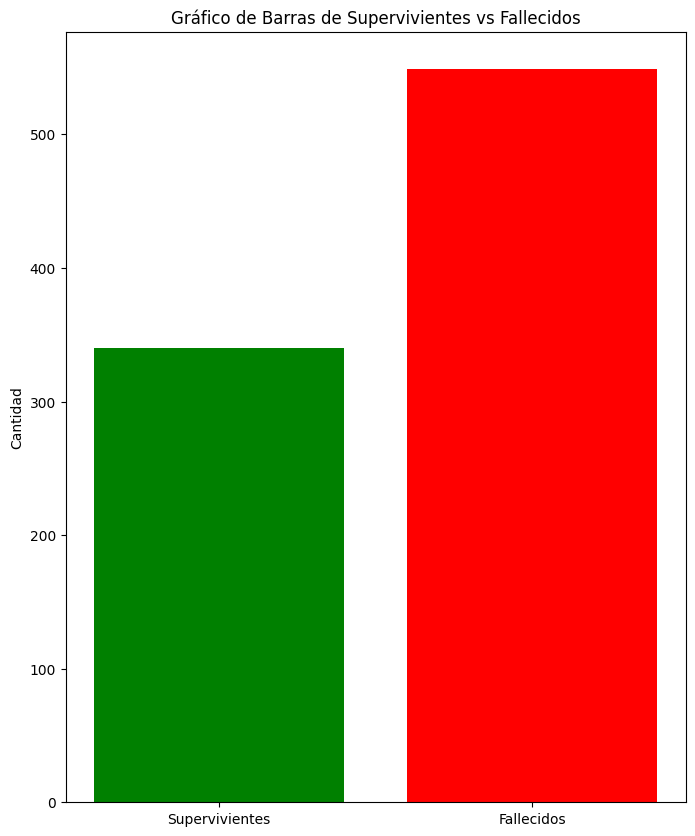

In [278]:
cantidad_personas = df['Survived'].value_counts()
supervivientes = cantidad_personas[1]
fallecidos = cantidad_personas[0]

plt.figure(figsize=(8, 10))
plt.bar(["Supervivientes", "Fallecidos"], [supervivientes, fallecidos], color=["green", "red"] )
plt.title("Gráfico de Barras de Supervivientes vs Fallecidos")
plt.ylabel("Cantidad") # Agrega el titulo del eje y

plt.show()

### **Gráfico de Pastel sobre Supervivientes vs Fallecidos**

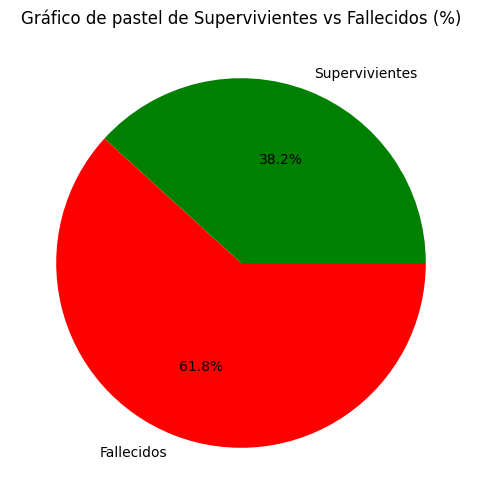

In [279]:
plt.figure(figsize=[6,6])
plt.pie([supervivientes, fallecidos], labels=["Supervivientes", "Fallecidos"], colors=["green", "red"], autopct="%1.1f%%")
plt.title("Gráfico de pastel de Supervivientes vs Fallecidos (%)")

plt.show()